# Computer Vision - Assignment 2 - Deep Learning for Computer Vision

#### 10 points   |   Due date: November 26, 23:59   |   Submission site: https://pradogrado2324.ugr.es/

### Student's Full Name: GONZÁLEZ DURÁN, DAVID

The goal of this assignment is to learn how to implement and use Convolutional Neural Networks using the fastai library (https://docs.fast.ai/).

In [ ]:
# The first thing we should do is to apply hardware acceleration via GPU. So, we have to go to Editar - Configuracion del Cuaderno - Acelerador por Hardware GPU

# Now we SET UP Fastai
!pip install -Uqq fastbook
!pip install nbdev
import fastbook
fastbook.setup_book()
import fastai
import fastcore
print(f'fastcore version {fastcore.__version__} installed')
print(f'fastai version {fastai.__version__} installed')
from nbdev.showdoc import *
from fastai.vision.all import *

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 521.2/521.2 kB 54.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 73.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 16.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 17.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 76.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.1/66.1 kB 967.3 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.7/58.7 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 11.2 MB/s eta 0:00:00
Mounted at /content/gdrive
fastcore version 1.5.29 installed
fastai version 2.7.13 installed


In [ ]:
# Function to display evaluation metrics

@patch
@delegates(subplots)
def plot_metrics(self: Recorder, nrows=None, ncols=None, figsize=None, **kwargs):
    metrics = np.stack(self.values)
    names = self.metric_names[1:-1]
    n = len(names) - 1
    if nrows is None and ncols is None:
        nrows = int(math.sqrt(n))
        ncols = int(np.ceil(n / nrows))
    elif nrows is None: nrows = int(np.ceil(n / ncols))
    elif ncols is None: ncols = int(np.ceil(n / nrows))
    figsize = figsize or (ncols * 6, nrows * 4)
    fig, axs = subplots(nrows, ncols, figsize=figsize, **kwargs)
    axs = [ax if i < n else ax.set_axis_off() for i, ax in enumerate(axs.flatten())][:n]
    for i, (name, ax) in enumerate(zip(names, [axs[0]] + axs)):
        ax.plot(metrics[:, i], color='#1f77b4' if i == 0 else '#ff7f0e', label='valid' if i > 0 else 'train')
        ax.set_title(name if i > 1 else 'losses')
        ax.legend(loc='best')
    plt.show()



---



---



---



# <font color=#80BEF1>**Exercise  3: Model transfer and fine-tuning with ResNet18 for the Caltech-UCSD Birds-200-2011 database (3.5 points)**
<font color=#80BEF1>In this exercise we will work with the Caltech-UCSD Birds-200-2011 dataset (https://www.vision.caltech.edu/datasets/cub_200_2011/). This dataset consists of 11,788 images of 200 bird species. It has 200 classes, with 5,994 for training and 5,794 for testing. Again, 10% of the training set will be left for validation. Read the dataset using the provided functions.

<font color=#80BEF1>We will use the ResNet18 network model already pre-trained with ImageNet, it can be downloaded from the fastai Model repository. You have to compare the performance of the following models and training strategies:

<font color=#80BEF1>1. Use ResNet18 as a feature extractor for the Caltech-UCSD Birds-200-2011 dataset under three different scenarios:

>  <font color=#80BEF1>1.1. Remove the final fully-connected (FC) layer of ResNet18, replace it by a FC layer of the dimensionality of the new problem, and train the new weights of this FC layer (while keeping frozen the remaining weights in the network).

> <font color=#80BEF1>1.2. Instead of a single FC layer, employ the head introduced by default in fastai (see https://wandb.ai/capecape/imagenette_timm/reports/Checking-Out-the-New-fastai-timm-Integration--VmlldzoxOTMzNzMw and https://docs.fast.ai/vision.learner.html#head-and-model). Train these new weights (while keeping frozen the remaining weights in the network).

> <font color=#80BEF1>1.3. Create your own head, combining all types of blocks you want (convolutional, FC layers,...). Train all these new weights (while keeping frozen the remaining weight in the network).

<font color=#80BEF1>2. Make a fine-tuning of the entire ResNet18 network. Remember that the number of epochs for fine-tuning must be small.

<font color=#80BEF1>3. Train from scratch the entire ResNet18 network. Remember that the number of epochs for fine-tuning must be VERY small.





---



---



---

First, we need to read the data from the URL

In [ ]:
# https://docs.fast.ai/data.external.html
path = untar_data(URLs.CUB_200_2011)

In [ ]:
print(path)
print(path.ls())
print((path/'CUB_200_2011/').ls())
train_test_split = np.loadtxt('/root/.fastai/data/CUB_200_2011/CUB_200_2011/train_test_split.txt',dtype=int)
# !cat /root/.fastai/data/CUB_200_2011/CUB_200_2011/train_test_split.txt

print('Number of testing examples: ', (train_test_split[:,1]== 0).sum())
print('Number of training examples: ', (train_test_split[:,1]== 1).sum())
print(train_test_split)


/root/.fastai/data/CUB_200_2011
[Path('/root/.fastai/data/CUB_200_2011/CUB_200_2011'), Path('/root/.fastai/data/CUB_200_2011/attributes.txt')]
[Path('/root/.fastai/data/CUB_200_2011/CUB_200_2011/attributes'), Path('/root/.fastai/data/CUB_200_2011/CUB_200_2011/bounding_boxes.txt'), Path('/root/.fastai/data/CUB_200_2011/CUB_200_2011/parts'), Path('/root/.fastai/data/CUB_200_2011/CUB_200_2011/images'), Path('/root/.fastai/data/CUB_200_2011/CUB_200_2011/README'), Path('/root/.fastai/data/CUB_200_2011/CUB_200_2011/train_test_split.txt'), Path('/root/.fastai/data/CUB_200_2011/CUB_200_2011/classes.txt'), Path('/root/.fastai/data/CUB_200_2011/CUB_200_2011/images.txt'), Path('/root/.fastai/data/CUB_200_2011/CUB_200_2011/image_class_labels.txt')]
Number of testing examples:  5794
Number of training examples:  5994
[[    1     0]
 [    2     1]
 [    3     0]
 ...
 [11786     0]
 [11787     1]
 [11788     0]]


In [ ]:
with open('/root/.fastai/data/CUB_200_2011/CUB_200_2011/images.txt') as file:
    images_list = file.readlines()
    images_list = [line.rstrip() for line in images_list]
print(images_list)

['1 001.Black_footed_Albatross/Black_Footed_Albatross_0046_18.jpg', '2 001.Black_footed_Albatross/Black_Footed_Albatross_0009_34.jpg', '3 001.Black_footed_Albatross/Black_Footed_Albatross_0002_55.jpg', '4 001.Black_footed_Albatross/Black_Footed_Albatross_0074_59.jpg', '5 001.Black_footed_Albatross/Black_Footed_Albatross_0014_89.jpg', '6 001.Black_footed_Albatross/Black_Footed_Albatross_0085_92.jpg', '7 001.Black_footed_Albatross/Black_Footed_Albatross_0031_100.jpg', '8 001.Black_footed_Albatross/Black_Footed_Albatross_0051_796103.jpg', '9 001.Black_footed_Albatross/Black_Footed_Albatross_0010_796097.jpg', '10 001.Black_footed_Albatross/Black_Footed_Albatross_0025_796057.jpg', '11 001.Black_footed_Albatross/Black_Footed_Albatross_0023_796059.jpg', '12 001.Black_footed_Albatross/Black_Footed_Albatross_0086_796062.jpg', '13 001.Black_footed_Albatross/Black_Footed_Albatross_0049_796063.jpg', '14 001.Black_footed_Albatross/Black_Footed_Albatross_0006_796065.jpg', '15 001.Black_footed_Albatr

In [ ]:
classes = (path/'CUB_200_2011/images/').ls()
print('Number of examples per class')
for i in range(len(classes)):
  print(len(classes[i].ls()), end=" ")


Number of examples per class
60 60 60 60 60 59 60 59 58 60 60 60 56 60 60 60 60 60 60 60 60 58 60 60 60 59 59 60 60 59 60 60 60 60 60 60 53 60 59 58 60 48 60 60 59 44 60 60 51 60 60 60 60 60 59 60 50 60 60 60 60 60 60 60 60 60 60 60 60 60 59 56 60 58 59 60 59 60 60 60 53 60 60 60 60 60 60 59 59 60 60 60 60 59 60 60 59 60 56 60 60 60 60 59 60 60 58 60 60 60 59 59 50 60 60 60 60 60 52 60 59 60 60 60 60 60 59 60 60 60 60 60 60 60 57 60 60 60 60 59 53 60 60 60 60 60 60 60 50 60 60 60 60 60 60 50 57 60 60 60 60 60 60 59 60 60 59 45 60 60 58 60 60 59 49 60 59 59 60 60 59 59 60 60 60 60 60 60 59 60 59 60 60 60 41 60 60 60 60 59 

In [ ]:
# Now we have in images_list the list with all the images, and in train_test_split which ones belong to training (1) or test (0)
# We are going to create two folders: one train and another test, and we are going to put the corresponding images inside
print(path)
import shutil, os
if os.path.isdir('/root/.fastai/data/CUB_200_2011/train'):
  shutil.rmtree('/root/.fastai/data/CUB_200_2011/train')
if os.path.isdir('/root/.fastai/data/CUB_200_2011/test'):
  shutil.rmtree('/root/.fastai/data/CUB_200_2011/test')

shutil.copytree('/root/.fastai/data/CUB_200_2011/CUB_200_2011/images','/root/.fastai/data/CUB_200_2011/train')
shutil.copytree('/root/.fastai/data/CUB_200_2011/CUB_200_2011/images','/root/.fastai/data/CUB_200_2011/test')


/root/.fastai/data/CUB_200_2011


'/root/.fastai/data/CUB_200_2011/test'

In [ ]:
print((path/'train').ls())
print(len((path/'train').ls()))

[Path('/root/.fastai/data/CUB_200_2011/train/130.Tree_Sparrow'), Path('/root/.fastai/data/CUB_200_2011/train/073.Blue_Jay'), Path('/root/.fastai/data/CUB_200_2011/train/042.Vermilion_Flycatcher'), Path('/root/.fastai/data/CUB_200_2011/train/102.Western_Wood_Pewee'), Path('/root/.fastai/data/CUB_200_2011/train/184.Louisiana_Waterthrush'), Path('/root/.fastai/data/CUB_200_2011/train/168.Kentucky_Warbler'), Path('/root/.fastai/data/CUB_200_2011/train/052.Pied_billed_Grebe'), Path('/root/.fastai/data/CUB_200_2011/train/126.Nelson_Sharp_tailed_Sparrow'), Path('/root/.fastai/data/CUB_200_2011/train/003.Sooty_Albatross'), Path('/root/.fastai/data/CUB_200_2011/train/172.Nashville_Warbler'), Path('/root/.fastai/data/CUB_200_2011/train/106.Horned_Puffin'), Path('/root/.fastai/data/CUB_200_2011/train/116.Chipping_Sparrow'), Path('/root/.fastai/data/CUB_200_2011/train/012.Yellow_headed_Blackbird'), Path('/root/.fastai/data/CUB_200_2011/train/094.White_breasted_Nuthatch'), Path('/root/.fastai/data/

In [ ]:
import os
for i in range(len(train_test_split)):
    if train_test_split[i,1]==0: #test image
       os.remove(path/'train'/images_list[i].rsplit(' ')[1]) #we remove it from train
    if train_test_split[i,1]==1: #train image
      os.remove(path/'test'/images_list[i].rsplit(' ')[1]) #we remove it from test

In [ ]:
files_train = get_image_files(path/'train')
files_test = get_image_files(path/'test')
print('Total training images: ', len(files_train))
print('Total test images: ', len(files_test))

Total training images:  5994
Total test images:  5794


In [ ]:
from PIL import Image

# Ruta de una imagen cualquiera
image_paths = files_train[0:10]

# Iterar sobre las rutas y obtener las dimensiones de cada imagen
for image_path in image_paths:
    # Cargar la imagen
    image = Image.open(image_path)

    # Obtener las dimensiones de la imagen
    width, height = image.size

    # Mostrar las dimensiones
    print(f'Ancho de la imagen ({image_path}): {width}')
    print(f'Alto de la imagen ({image_path}): {height}')

Ancho de la imagen (/root/.fastai/data/CUB_200_2011/train/130.Tree_Sparrow/Tree_Sparrow_0121_124296.jpg): 500
Alto de la imagen (/root/.fastai/data/CUB_200_2011/train/130.Tree_Sparrow/Tree_Sparrow_0121_124296.jpg): 375
Ancho de la imagen (/root/.fastai/data/CUB_200_2011/train/130.Tree_Sparrow/Tree_Sparrow_0130_124932.jpg): 332
Alto de la imagen (/root/.fastai/data/CUB_200_2011/train/130.Tree_Sparrow/Tree_Sparrow_0130_124932.jpg): 500
Ancho de la imagen (/root/.fastai/data/CUB_200_2011/train/130.Tree_Sparrow/Tree_Sparrow_0057_123665.jpg): 500
Alto de la imagen (/root/.fastai/data/CUB_200_2011/train/130.Tree_Sparrow/Tree_Sparrow_0057_123665.jpg): 333
Ancho de la imagen (/root/.fastai/data/CUB_200_2011/train/130.Tree_Sparrow/Tree_Sparrow_0097_123462.jpg): 500
Alto de la imagen (/root/.fastai/data/CUB_200_2011/train/130.Tree_Sparrow/Tree_Sparrow_0097_123462.jpg): 421
Ancho de la imagen (/root/.fastai/data/CUB_200_2011/train/130.Tree_Sparrow/Tree_Sparrow_0007_122911.jpg): 419
Alto de la ima

In [ ]:
dls = DataBlock(
        blocks=(ImageBlock, CategoryBlock),
        get_items=get_image_files,
        splitter=RandomSplitter(valid_pct=0.2, seed=42),
        get_y=parent_label,
        item_tfms=[Resize(224, method='crop')],
        batch_tfms=[Normalize.from_stats(*imagenet_stats),
                    *aug_transforms()]
      ).dataloaders(path/'train')

ResNET18 fue entrenado con imágenes de 224x224, por lo que yo usaré el mismo tamaño en mis imágenes. He usado 'crop' en vez de 'squish', ya que muchas imágenes son rectangulares, y se deformarían demasiado con 'squish'.

## <font color=#80BEF1> 3.1.1 Train single FC layer included in the head

En este primer apartado, se nos pide partir del modelo preentrenado ResNET18, y sustituir su cabeza actual, es decir, las últimas capas, por una sola capa fully-connected.

Por tanto, diseño la cabeza más sencilla posible, tan solo con un un flatten y una capa fully-connected.

In [ ]:
my_head = nn.Sequential(
    nn.Flatten(),
    nn.Linear(in_features=7*7*512, out_features=200)
)

Instanciamos el objeto `vision_learner`, incorporando el datablock, el modelo, y la estructura de la cabeza que hemos creado. Indicamos que el modelo está preentrenado, de modo que el Learner ajustará únicamente los parámetros entrenables de la cabeza que hemos modificado.

In [ ]:
learn1 = vision_learner(dls, resnet18, metrics=[accuracy,error_rate],
                       loss_func=FocalLossFlat(), pretrained=True,
                       custom_head=my_head)
learn1.summary()

Sequential (Input shape: 64 x 3 x 224 x 224)
Layer (type)         Output Shape         Param #    Trainable 
                     64 x 64 x 112 x 112 
Conv2d                                    9408       False     
BatchNorm2d                               128        True      
ReLU                                                           
____________________________________________________________________________
                     64 x 64 x 56 x 56   
MaxPool2d                                                      
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
ReLU                                                           
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
ReLU                      

Como podemos apreciar, `fastai` no solo considera entrenables los pesos de la cabeza que hemos modificado, sino también los parámetros de las capas de normalización en batch.

Esta decisión se basa en la idea de que al ajustar un modelo preentrenado a nuevos datos, es beneficioso permitir que las capas de normalización también se adapten a las estadísticas del nuevo conjunto de datos.

Esto se explica en la documentación de `fastai`:

> `train_bn` (set True by default) controls if BatchNorm layers are trained even when they are supposed to be
> frozen according to the splitter. Our empirical experiments have shown that it’s the
> best behavior for those layers in transfer learning.

Si lo dice `fastai` va a misa.

Better model found at epoch 0 with valid_loss value: 7.053037643432617.


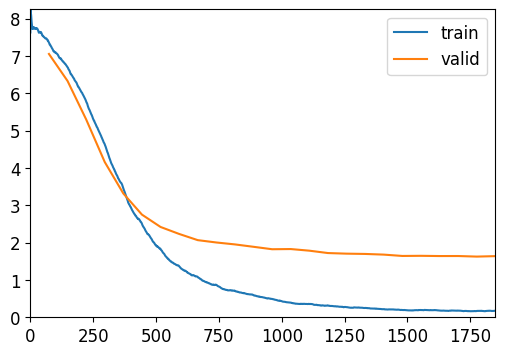

Better model found at epoch 1 with valid_loss value: 6.329320430755615.
Better model found at epoch 2 with valid_loss value: 5.300371170043945.
Better model found at epoch 3 with valid_loss value: 4.158003330230713.
Better model found at epoch 4 with valid_loss value: 3.314758777618408.
Better model found at epoch 5 with valid_loss value: 2.749617099761963.
Better model found at epoch 6 with valid_loss value: 2.4189388751983643.
Better model found at epoch 7 with valid_loss value: 2.2319250106811523.
Better model found at epoch 8 with valid_loss value: 2.065962076187134.
Better model found at epoch 9 with valid_loss value: 2.003307819366455.
Better model found at epoch 10 with valid_loss value: 1.9517161846160889.
Better model found at epoch 11 with valid_loss value: 1.8876177072525024.
Better model found at epoch 12 with valid_loss value: 1.822369933128357.
Better model found at epoch 14 with valid_loss value: 1.7836804389953613.
Better model found at epoch 15 with valid_loss value: 1

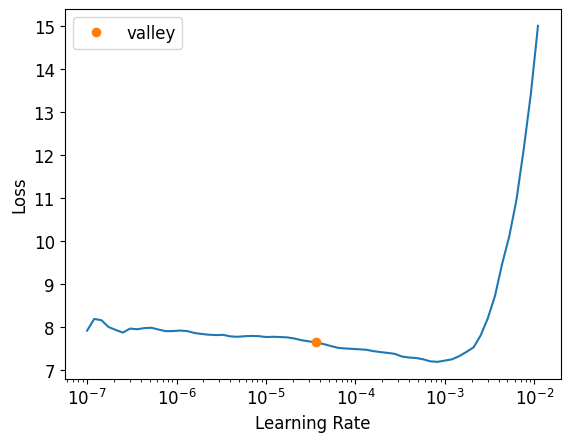

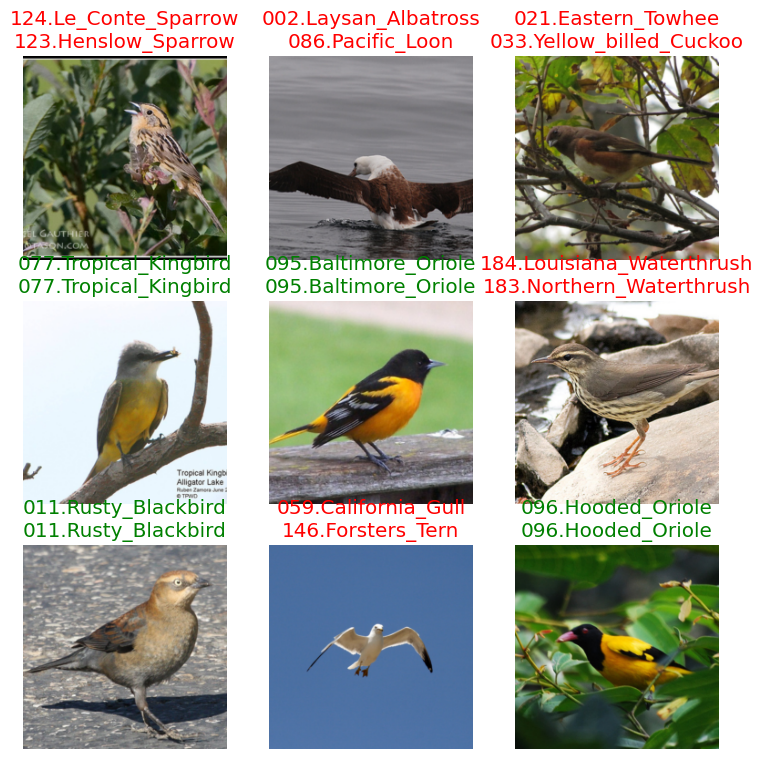

In [ ]:
lr=learn1.lr_find()
cbs=[SaveModelCallback(), ShowGraphCallback(), EarlyStoppingCallback(min_delta=0.01, patience=5)]
learn1.fit_one_cycle(n_epoch=25, lr_max=lr[0], cbs=cbs)
learn1.show_results()

Podemos apreciar en la gráfica de pérdida que el modelo se sobreajusta a partir de la iteración 500, divergiendo rápidamente la curva de `train` y `valid`.

In [ ]:
test_files = [fn for fn in sorted((path/'test').glob('**/*')) if fn.is_file()]

test_dl = learn1.dls.test_dl(test_files,with_labels=True)

# We perform prediction on this bunch of data (in this case, the test set)
preds, targs, _ = learn1.get_preds(dl=test_dl, with_decoded=True)                # Por defecto normaliza los datos de la misma manera que están normalizados los de train

# We compute the confusion matrix
interp = ClassificationInterpretation.from_learner(learn1, 1, test_dl)
cm = interp.confusion_matrix()
print('Number of test examples:', np.sum(cm))
print('Test Accuracy')
print(np.sum(np.diagonal(cm))/np.sum(cm)*100)

Number of test examples: 5794
Test Accuracy
51.81221953745254


Finalmente, se logra una tasa de aciertos superior al 51%.

## <font color=#80BEF1> 3.1.2 Train head included by default in fastai

En este apartado se pide que usemos la cabeza original de ResNET18, la cual coincide en número de clases con nuestro problema, por lo que solo deberemos instanciar el `vision_learner` con el modelo `resnet18` tal cual, preentrenado, y, esta vez, sin cabeza modificada.

In [ ]:
learn2 = vision_learner(dls, resnet18, metrics=[accuracy,error_rate],
                       loss_func=FocalLossFlat(), pretrained=True)
learn2.summary()

Sequential (Input shape: 64 x 3 x 224 x 224)
Layer (type)         Output Shape         Param #    Trainable 
                     64 x 64 x 112 x 112 
Conv2d                                    9408       False     
BatchNorm2d                               128        True      
ReLU                                                           
____________________________________________________________________________
                     64 x 64 x 56 x 56   
MaxPool2d                                                      
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
ReLU                                                           
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
ReLU                      

Aquí podemos analizar la arquitectura del modelo ResNET18 sin alteraciones. Como vemos, es un modelo con una serie de módulos convolucionales (cada uno formado por varias capas convolucionales) con diferentes tamaños de filtro para capturar características a diferentes escalas. También apreciamos en estos módulos, capas ReLU así como capas de normalización en batch.

`AdaptiveAvgPool2d` y `AdaptiveMaxPool2d` son capas de pooling adaptativas que permiten realizar un pooling y obtener un tamaño específico de salida, independientemente de las dimensiones de la entrada

Por último, tiene una serie de capas fully-connected con normalización en batch y Dropout, para regularizar.

Better model found at epoch 0 with valid_loss value: 5.658723831176758.


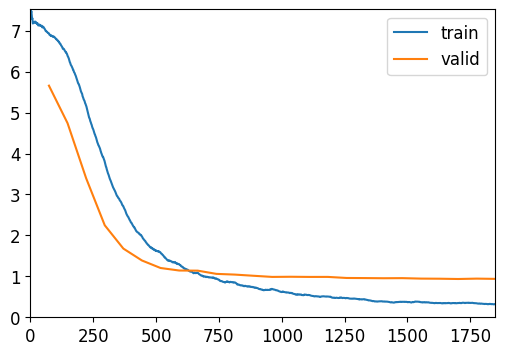

Better model found at epoch 1 with valid_loss value: 4.742437362670898.
Better model found at epoch 2 with valid_loss value: 3.396512031555176.
Better model found at epoch 3 with valid_loss value: 2.2477548122406006.
Better model found at epoch 4 with valid_loss value: 1.678367257118225.
Better model found at epoch 5 with valid_loss value: 1.3873459100723267.
Better model found at epoch 6 with valid_loss value: 1.2039101123809814.
Better model found at epoch 7 with valid_loss value: 1.1424521207809448.
Better model found at epoch 8 with valid_loss value: 1.1390684843063354.
Better model found at epoch 9 with valid_loss value: 1.060539722442627.
Better model found at epoch 10 with valid_loss value: 1.0427333116531372.
Better model found at epoch 11 with valid_loss value: 1.0140608549118042.
Better model found at epoch 12 with valid_loss value: 0.9861381649971008.
Better model found at epoch 14 with valid_loss value: 0.9859280586242676.
Better model found at epoch 16 with valid_loss valu

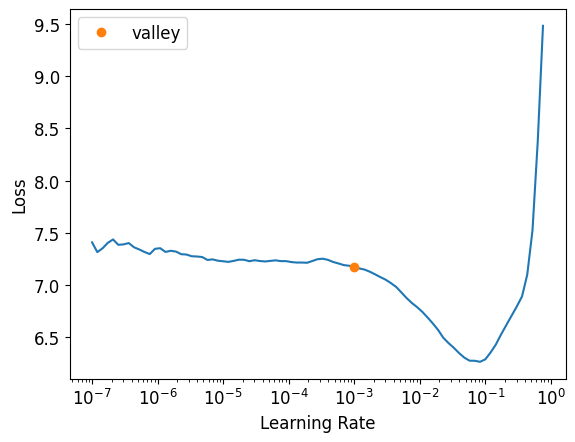

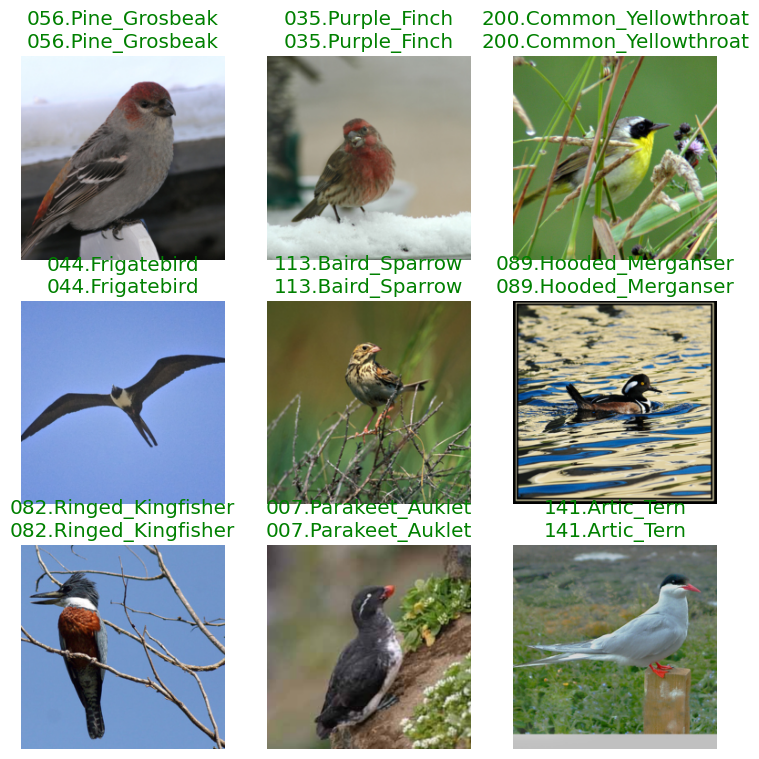

In [ ]:
lr=learn2.lr_find()
cbs=[SaveModelCallback(), ShowGraphCallback(), EarlyStoppingCallback(min_delta=0.01, patience=5)]
learn2.fit_one_cycle(n_epoch=25, lr_max=lr[0], cbs=cbs)
learn2.show_results()

Los resultados de este proceso de entrenamiento superan a los anteriores, como era de esperar, logrando una mejora de más del 14% en la tasa de aciertos. Al observar el gráfico, se nota que el sobreajuste del modelo es menos pronunciado, evidenciado por una menor divergencia entre las curvas de entrenamiento y validación. Este fenómeno probablemente se debe a la regularización introducida por las capas de `Dropout`.

## <font color=#80BEF1> 3.1.3. Train new custom head (including convolutional layers, FC layers, etc.)

En este tercer apartado, se nos pide que diseñemos una cabeza que expanda la red ResNET18, incluyendo un mayor número de capas convolucionales y fully-connected:

In [ ]:
# To be completed by the students
new_head = nn.Sequential(
    nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),   # 7x7 | 7x7
    nn.ReLU(),
    nn.BatchNorm2d(512),
    nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),   # 7x7 | 7x7
    nn.ReLU(),
    nn.BatchNorm2d(512),
    nn.MaxPool2d(kernel_size=2, stride=2),                     # 7x7 | 3x3

    nn.Flatten(),                                              # 3x3 | 9

    nn.BatchNorm1d(3*3*512),
    nn.Dropout(),
    nn.Linear(in_features=3*3*512, out_features=200),
    nn.ReLU(),
    nn.BatchNorm1d(200),
    nn.Dropout(),
    nn.Linear(in_features=200, out_features=200)
)

learn3 = vision_learner(dls, resnet18, metrics=[accuracy,error_rate],
                       loss_func=FocalLossFlat(), pretrained=True,
                       custom_head=new_head)
learn3.summary()

Sequential (Input shape: 64 x 3 x 224 x 224)
Layer (type)         Output Shape         Param #    Trainable 
                     64 x 64 x 112 x 112 
Conv2d                                    9408       False     
BatchNorm2d                               128        True      
ReLU                                                           
____________________________________________________________________________
                     64 x 64 x 56 x 56   
MaxPool2d                                                      
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
ReLU                                                           
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
ReLU                      

Nuestro modelo tiene 16.869.792 parámetros, frente a los 11.806.272 del ResNET original.

Better model found at epoch 0 with valid_loss value: 4.410524845123291.


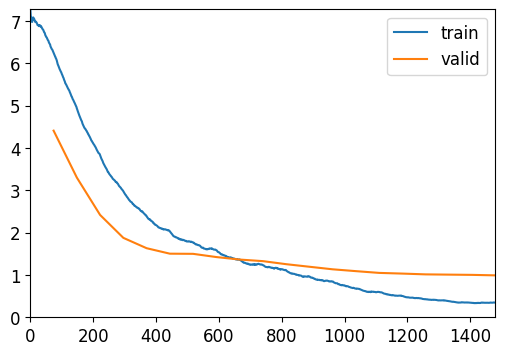

Better model found at epoch 1 with valid_loss value: 3.301466703414917.
Better model found at epoch 2 with valid_loss value: 2.418506383895874.
Better model found at epoch 3 with valid_loss value: 1.8770142793655396.
Better model found at epoch 4 with valid_loss value: 1.6325100660324097.
Better model found at epoch 5 with valid_loss value: 1.5031136274337769.
Better model found at epoch 6 with valid_loss value: 1.4992543458938599.
Better model found at epoch 7 with valid_loss value: 1.423143744468689.
Better model found at epoch 8 with valid_loss value: 1.3642234802246094.
Better model found at epoch 9 with valid_loss value: 1.3269106149673462.
Better model found at epoch 10 with valid_loss value: 1.2549505233764648.
Better model found at epoch 11 with valid_loss value: 1.1942497491836548.
Better model found at epoch 12 with valid_loss value: 1.1338167190551758.
Better model found at epoch 13 with valid_loss value: 1.0903745889663696.
Better model found at epoch 14 with valid_loss val

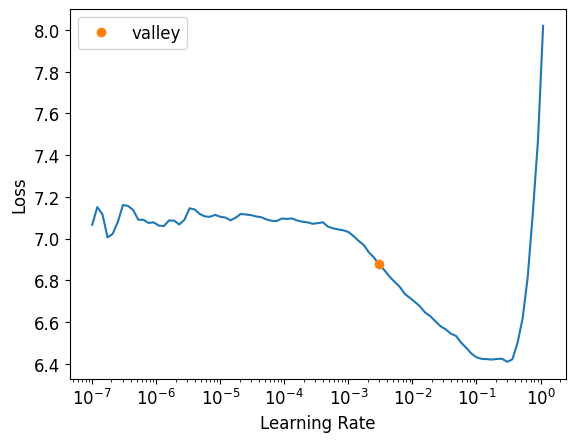

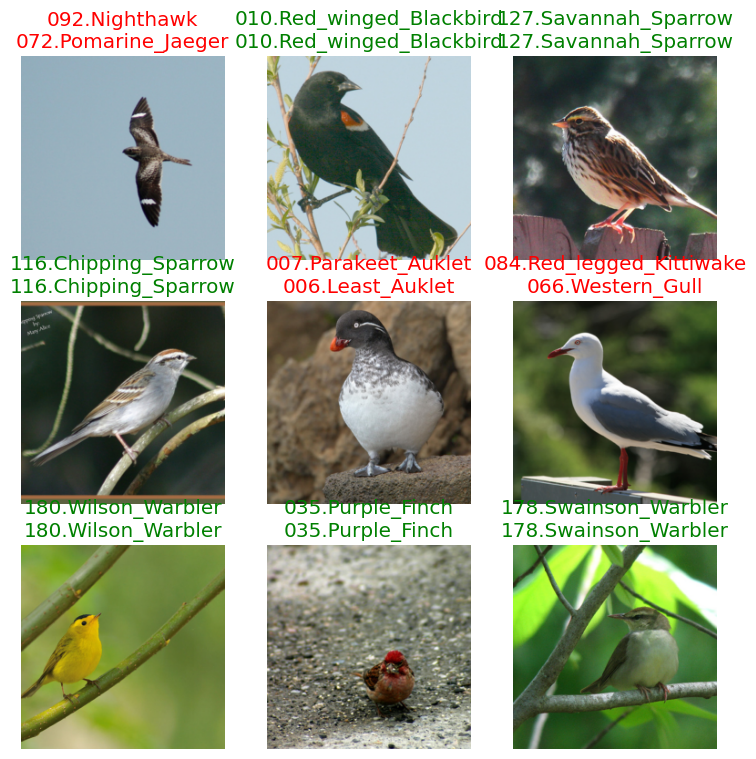

In [ ]:
lr=learn3.lr_find()
cbs=[SaveModelCallback(), ShowGraphCallback(), EarlyStoppingCallback(min_delta=0.01, patience=3)]
learn3.fit_one_cycle(n_epoch=20, lr_max=lr[0], cbs=cbs)
learn3.show_results()

A pesar del mayor número de parámetros, el modelo no ha logrado mayor tasa de acierto que el ResNET18 original.

## <font color=#80BEF1> 3.2. Fine-tuning of all ResNet18 (including the suitable FC layer as output/head)

En este ejercicio se nos pide fine-tunear el modelo ResNET18 original, sin alteraciones (ya que ha sido el que mejor resultados ha dado anteriormente). El objetivo es perfeccionar, capa por capa, los parámetros del modelo para adaptarlos de manera más precisa a los datos de entrada

In [ ]:
# To be completed by the students
learn4 = vision_learner(dls, resnet18, metrics=[accuracy,error_rate],
                       loss_func=FocalLossFlat(), pretrained=True)
learn4.summary()

Sequential (Input shape: 64 x 3 x 224 x 224)
Layer (type)         Output Shape         Param #    Trainable 
                     64 x 64 x 112 x 112 
Conv2d                                    9408       False     
BatchNorm2d                               128        True      
ReLU                                                           
____________________________________________________________________________
                     64 x 64 x 56 x 56   
MaxPool2d                                                      
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
ReLU                                                           
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
ReLU                      

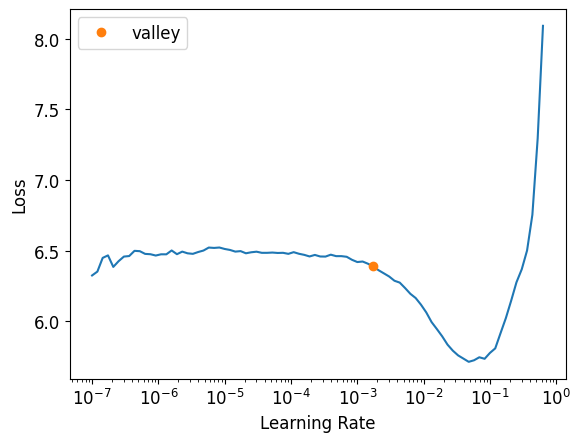

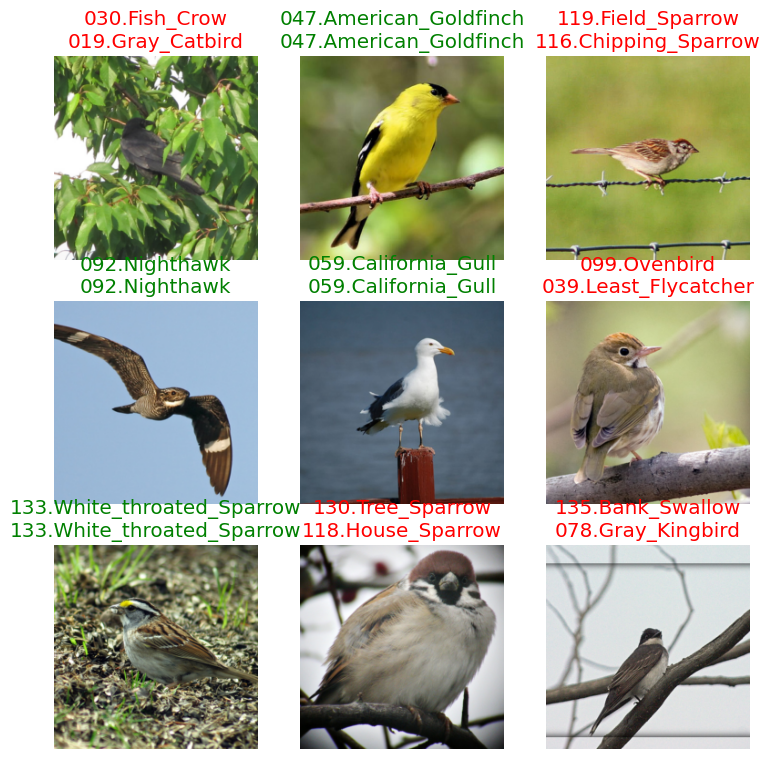

In [ ]:
lr=learn4.lr_find()
cbs=[SaveModelCallback(), ShowGraphCallback(), EarlyStoppingCallback(min_delta=0.01, patience=3)]
learn4.fine_tune(20, lr[0])
learn4.show_results()

Es esperable que este entrenamiento sea el de mayor acierto hasta ahora, dado que el fine-tunning aprovecha el conocimiento adquirido en tareas anteriores y permite adaptarse rápidamente a nuevos conjuntos de datos. Además, el propio método en sí regulariza, al entrenar cada capa congelando el resto, de manera que cada una se especializa en aprender características específicas para la tarea en cuestión.

## <font color=#80BEF1>  3.3. Train from scratch the entire ResNet18 (including the suitable FC layer as output/head)

En el tercer ejercicio, se nos pide entrenar desde cero el modelo ResNET18, sin modificaciones, como antes.
En principio, la intuición nos dice que no debería salir muy bien por las siguientes razones:

- Falta de generalización, debido a la falta de conjuntos de datos más grandes (normalmente usan ImageNet), que permiten al modelo reconocer patrones útiles y características generales.
- Problemas de optimización, al comenzar con parámetros aleatorios, lo que hace que el proceso necesite de más épocas para entrenar.

Iniciar un modelo desde cero pierde la oportunidad de aprovechar el conocimiento preexistente.

In [ ]:
learn5 = vision_learner(dls, resnet18, metrics=[accuracy,error_rate],
                       loss_func=FocalLossFlat(), pretrained=False)
learn5.summary()

Sequential (Input shape: 64 x 3 x 224 x 224)
Layer (type)         Output Shape         Param #    Trainable 
                     64 x 64 x 112 x 112 
Conv2d                                    9408       True      
BatchNorm2d                               128        True      
ReLU                                                           
____________________________________________________________________________
                     64 x 64 x 56 x 56   
MaxPool2d                                                      
Conv2d                                    36864      True      
BatchNorm2d                               128        True      
ReLU                                                           
Conv2d                                    36864      True      
BatchNorm2d                               128        True      
Conv2d                                    36864      True      
BatchNorm2d                               128        True      
ReLU                      

Better model found at epoch 0 with valid_loss value: 6.063924312591553.


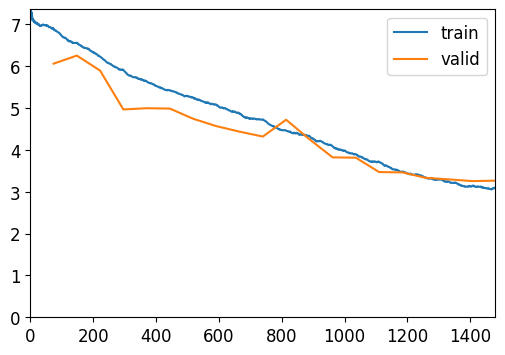

Better model found at epoch 2 with valid_loss value: 5.897703170776367.
Better model found at epoch 3 with valid_loss value: 4.968972206115723.
Better model found at epoch 6 with valid_loss value: 4.7467474937438965.
Better model found at epoch 7 with valid_loss value: 4.570064067840576.
Better model found at epoch 8 with valid_loss value: 4.437459468841553.
Better model found at epoch 9 with valid_loss value: 4.320378303527832.
Better model found at epoch 11 with valid_loss value: 4.257750988006592.
Better model found at epoch 12 with valid_loss value: 3.8235769271850586.
Better model found at epoch 13 with valid_loss value: 3.8154215812683105.
Better model found at epoch 14 with valid_loss value: 3.4722042083740234.
Better model found at epoch 15 with valid_loss value: 3.4636006355285645.
Better model found at epoch 16 with valid_loss value: 3.3343567848205566.
Better model found at epoch 17 with valid_loss value: 3.2966880798339844.
Better model found at epoch 18 with valid_loss val

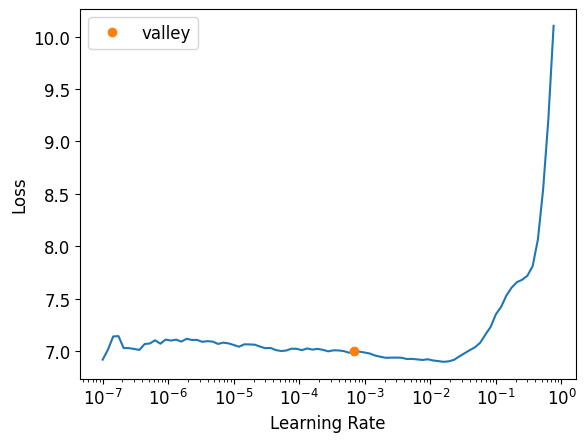

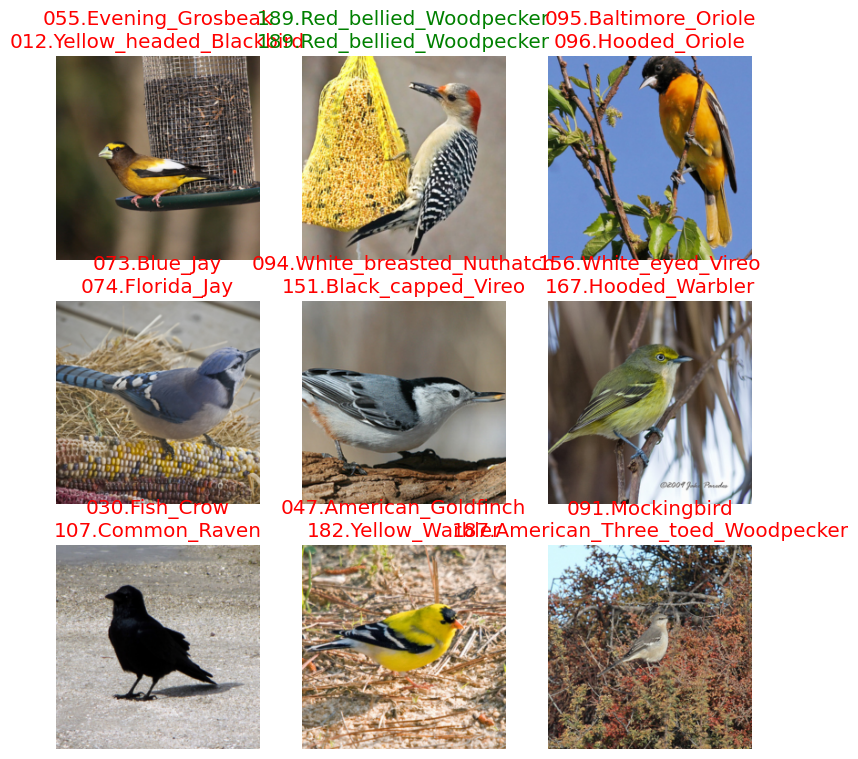

In [ ]:
lr=learn5.lr_find()
cbs=[SaveModelCallback(), ShowGraphCallback(), EarlyStoppingCallback(min_delta=0.01, patience=3)]
learn5.fit_one_cycle(n_epoch=20, lr_max=lr[0], cbs=cbs)
learn5.show_results()

Efectivamente, tenemos un entrenamiento con muy baja tasa de acierto, si bien la mejora del modelo es constante, e incluso se puede intuir que en las siguientes épocas seguirá mejorando.